## GRL Figure 1
##### Dr. Victor Gensini (Fall 2017)
##### Department of Geographic and Atmospheric Sciences
<img style="float:left;height:40px"src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQthtdrc2lZyEOC1iiwubFyvNfzJE7q7_GCTdlFF3peKckmi7cN">

#### Necessary files to be placed in working directory
#####  gwo.csv  |  1955-2016_hail.csv 
##### Available here: https://github.com/vgensini/gwohail

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import scipy.ndimage
import scipy.stats
import matplotlib.font_manager as font_manager
from matplotlib import cm
import matplotlib.colors as colors
from matplotlib.mlab import bivariate_normal

### Change default font

In [2]:
#fontpath = '/home/vgensini/Programs/anaconda2/lib/python2.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSansMono.ttf'
#prop = font_manager.FontProperties(fname=fontpath)
#matplotlib.rcParams['font.family'] = prop.get_name()

### Read in data

In [3]:
hail_file = '1955-2016_hail.csv'
gwo_file = 'gwo.csv'
hail_df = pd.read_csv(hail_file)
gwo_df = pd.read_csv(gwo_file)
formats = '%Y-%m-%d'
hail_df['datei']=pd.to_datetime(hail_df['date'], format=formats)
hail_df=hail_df.set_index(pd.DatetimeIndex(hail_df['datei']))
gwo_df['date']=pd.to_datetime(gwo_df['date'], format=formats)
gwo_df=gwo_df.set_index(pd.DatetimeIndex(gwo_df['date']))
query='yr>=1979 & yr<=2016 & mag>=1'
sevhail_df = hail_df.query(query)
query='yr>=1979 & yr<=2016 & mag>=2'
sighail_df = hail_df.query(query)
query='yr>=1979 & yr<=2016 & mag>=4'
gianthail_df = hail_df.query(query)
query='year>=1979 & year<=2016 & amp>=1'
query1='year>=1979 & year<=2016 & amp<1'
gwo1days_df = gwo_df.query(query)
gwo_neu_days_df = gwo_df.query(query1)
neu_hail_df=gwo_neu_days_df.loc[gwo_neu_days_df['date'].isin(sevhail_df['date'])]
sev_hail_df=gwo1days_df.loc[gwo1days_df['date'].isin(sevhail_df['date'])]
sig_hail_df=gwo1days_df.loc[gwo1days_df['date'].isin(sighail_df['date'])]
giant_hail_df=gwo1days_df.loc[gwo1days_df['date'].isin(gianthail_df['date'])]

### Calculate hail day percentiles (Given hail day, what are the ith percentile counts?)

In [4]:
sevhail_counts_df = sevhail_df.groupby('date').count() # Hail reports per hail day
print sevhail_counts_df.mag.quantile(q=.90) #90th percentile hail day count
print sevhail_counts_df.mag.quantile(q=.95) #95th percentile hail day count
print sevhail_counts_df.mag.quantile(q=.99) #95th percentile hail day count

60.0
87.0
162.0


### Calculate some probabilities & perform binomial test statistic

In [5]:
months = np.arange(1,13,1)
phases = [0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5]
expected_probs = [0.124779673,0.249723238,0.249723238,0.290153223,0.747498533,0.951075167,0.985081364,0.959273693,0.903048231,0.624189335,0.356445832,0.159852648,0.097388278]
for i,month in enumerate(months):
    for phase in phases:
        query = 'mo == %s' % (month)
        sev_hail_days = sevhail_df.query(query)
        query = 'month == %s & phase== %s' % (month,phase)
        gwo_days = gwo1days_df.query(query)
        print month,phase,scipy.stats.binom_test(len(gwo_days.loc[gwo_days['date'].isin(sev_hail_days['date'])]), len(gwo_days), expected_probs[i], alternative='two-sided')
    

1 0.5 1.0
1 1.5 1.0
1 2.5 0.771628568759
1 3.5 1.0
1 4.5 0.34336742912
1 5.5 1.0
1 6.5 0.602950814244
1 7.5 0.186147034164
2 0.5 0.498624575758
2 1.5 0.723804382029
2 2.5 0.449262683414
2 3.5 0.329909710312
2 4.5 0.00739082147684
2 5.5 0.666445396585
2 6.5 0.0793910162475
2 7.5 0.258691967642
3 0.5 2.14118712578e-15
3 1.5 3.18679929333e-15
3 2.5 1.68875497169e-12
3 3.5 2.56008961856e-07
3 4.5 1.21758378172e-06
3 5.5 0.0004785290614
3 6.5 1.8877368768e-13
3 7.5 4.32273318686e-11
4 0.5 9.84696381443e-27
4 1.5 7.94683403157e-38
4 2.5 4.92807980077e-29
4 3.5 3.85895479738e-21
4 4.5 1.73836990002e-16
4 5.5 6.62696672952e-11
4 6.5 6.78502955148e-13
4 7.5 3.01523563535e-17
5 0.5 8.45800807548e-11
5 1.5 1.25491035733e-09
5 2.5 0.00111122271257
5 3.5 9.32655736934e-06
5 4.5 8.92483147937e-05
5 5.5 8.92157683923e-09
5 6.5 6.63863763708e-07
5 7.5 1.67642558462e-07
6 0.5 0.802361198176
6 1.5 0.00470882282773
6 2.5 0.010968600442
6 3.5 0.0102090017393
6 4.5 0.587605622123
6 5.5 0.371818151054
6 6.5

In [6]:
months = np.arange(1,13,1)
phases = [0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5]
expected_probs = [0.124779673,0.249723238,0.249723238,0.290153223,0.747498533,0.951075167,0.985081364,0.959273693,0.903048231,0.624189335,0.356445832,0.159852648,0.097388278]
for i,month in enumerate(months):
    query = 'mo == %s' % (month)
    sev_hail_days = sevhail_df.query(query)
    query = 'month == %s' % (month)
    gwo_days = gwo_neu_days_df.query(query)
    print gwo_days.loc[gwo_days['date'].isin(sev_hail_days['date'])]
    #print sev_hail_days.loc[sev_hail_days['datei'].isin(gwo_days['date'])].count()
    #print len (gwo_days)
    #print month,phase,scipy.stats.binom_test(len(gwo_days.loc[gwo_days['date'].isin(sev_hail_days['date'])]), len(gwo_days), expected_probs[i], alternative='two-sided')

            year  month  day       date   aam    dt  phase  amp
date                                                           
1980-01-17  1980      1   17 1980-01-17  0.82  0.07    6.5  0.8
1982-01-03  1982      1    3 1982-01-03  0.33 -0.26    7.5  0.4
1990-01-16  1990      1   16 1990-01-16 -0.59  0.03    2.5  0.6
1990-01-19  1990      1   19 1990-01-19 -0.76  0.31    2.5  0.8
1990-01-20  1990      1   20 1990-01-20 -0.69  0.65    3.5  0.9
1991-01-24  1991      1   24 1991-01-24 -0.01 -0.50    0.5  0.5
1993-01-24  1993      1   24 1993-01-24  0.90 -0.10    6.5  0.9
1994-01-03  1994      1    3 1994-01-03  0.07 -0.54    0.5  0.5
1994-01-25  1994      1   25 1994-01-25 -0.72  0.50    3.5  0.9
1994-01-26  1994      1   26 1994-01-26 -0.69  0.54    3.5  0.9
1995-01-18  1995      1   18 1995-01-18  0.33  0.01    6.5  0.3
1996-01-02  1996      1    2 1996-01-02 -0.54 -0.14    2.5  0.6
1997-01-04  1997      1    4 1997-01-04  0.37 -0.15    6.5  0.4
1997-01-08  1997      1    8 1997-01-08 

            year  month  day       date   aam    dt  phase  amp
date                                                           
1979-06-01  1979      6    1 1979-06-01 -0.48 -0.55    1.5  0.7
1979-06-04  1979      6    4 1979-06-04 -0.55  0.46    3.5  0.7
1979-06-07  1979      6    7 1979-06-07 -0.13  0.00    2.5  0.1
1979-06-08  1979      6    8 1979-06-08 -0.21 -0.74    0.5  0.8
1979-06-10  1979      6   10 1979-06-10 -0.27 -0.12    1.5  0.3
1979-06-12  1979      6   12 1979-06-12 -0.28 -0.05    2.5  0.3
1979-06-18  1979      6   18 1979-06-18  0.47  0.34    5.5  0.6
1979-06-19  1979      6   19 1979-06-19  0.40 -0.53    7.5  0.7
1980-06-01  1980      6    1 1980-06-01 -0.20  0.19    3.5  0.3
1980-06-02  1980      6    2 1980-06-02 -0.21 -0.28    1.5  0.3
1980-06-03  1980      6    3 1980-06-03 -0.24  0.29    3.5  0.4
1980-06-05  1980      6    5 1980-06-05 -0.03  0.54    4.5  0.5
1980-06-06  1980      6    6 1980-06-06  0.00  0.04    4.5  0.0
1980-06-07  1980      6    7 1980-06-07 

            year  month  day       date   aam    dt  phase  amp
date                                                           
1979-11-19  1979     11   19 1979-11-19 -0.58 -0.06    2.5  0.6
1981-11-05  1981     11    5 1981-11-05 -0.70  0.19    2.5  0.7
1982-11-01  1982     11    1 1982-11-01 -0.22 -0.34    1.5  0.4
1982-11-02  1982     11    2 1982-11-02 -0.24  0.45    3.5  0.5
1983-11-19  1983     11   19 1983-11-19  0.39  0.27    5.5  0.5
1984-11-09  1984     11    9 1984-11-09 -0.43 -0.77    1.5  0.9
1985-11-13  1985     11   13 1985-11-13  0.22  0.01    6.5  0.2
1985-11-14  1985     11   14 1985-11-14  0.26  0.49    5.5  0.6
1986-11-24  1986     11   24 1986-11-24 -0.21  0.56    4.5  0.6
1988-11-03  1988     11    3 1988-11-03 -0.37  0.53    3.5  0.6
1988-11-04  1988     11    4 1988-11-04 -0.37  0.13    2.5  0.4
1988-11-09  1988     11    9 1988-11-09 -0.44  0.12    2.5  0.5
1988-11-11  1988     11   11 1988-11-11 -0.15  0.68    4.5  0.7
1988-11-12  1988     11   12 1988-11-12 

### Join percentile and GWO > 1 data

In [7]:
combo = gwo1days_df.join(sevhail_counts_df)
ninetyth_hail_df=combo[combo.mag>=60]
ninety5th_hail_df=combo[combo.mag>=87]
ninety9th_hail_df=combo[combo.mag>=162]

### Create 2-D Historgrams

In [8]:
sev_hist,xedges,yedges = np.histogram2d(sev_hail_df.dt,sev_hail_df.aam,bins=40,range=[[-4,4],[-4,4]])
sig_hist,xedges,yedges = np.histogram2d(sig_hail_df.dt,sig_hail_df.aam,bins=40,range=[[-4,4],[-4,4]])
giant_hist,xedges,yedges = np.histogram2d(giant_hail_df.dt,giant_hail_df.aam,bins=40,range=[[-4,4],[-4,4]])
sev90th_hist,xedges,yedges = np.histogram2d(ninetyth_hail_df.dt,ninetyth_hail_df.aam,bins=40,range=[[-4,4],[-4,4]])
sev95th_hist,xedges,yedges = np.histogram2d(ninety5th_hail_df.dt,ninety5th_hail_df.aam,bins=40,range=[[-4,4],[-4,4]])
sev99th_hist,xedges,yedges = np.histogram2d(ninety9th_hail_df.dt,ninety9th_hail_df.aam,bins=40,range=[[-4,4],[-4,4]])
gwo1_hist,xedges,yedges = np.histogram2d(gwo1days_df.dt,gwo1days_df.aam,bins=40,range=[[-4,4],[-4,4]])

### Calculate phase space probabilities 

In [9]:
sev90_prob = np.divide(sev90th_hist,np.sum(sev90th_hist))
sev95_prob = np.divide(sev95th_hist,np.sum(sev95th_hist))
sev99_prob = np.divide(sev99th_hist,np.sum(sev99th_hist))
sev_prob = np.divide(sev_hist,np.sum(sev_hist))
sig_prob = np.divide(sig_hist,np.sum(sig_hist))
giant_prob = np.divide(giant_hist,np.sum(giant_hist))
gwo1_prob = np.divide(gwo1_hist,np.sum(gwo1_hist))

### Calculate phase space anomalies & smooth

In [10]:
sev_anom = sev_prob - gwo1_prob
sig_anom = sig_prob - gwo1_prob
giant_anom = giant_prob - gwo1_prob
sev90_anom = sev90_prob - gwo1_prob
sev95_anom = sev95_prob - gwo1_prob
sev99_anom = sev99_prob - gwo1_prob

#Guassian smooth probs
sigma = 1.5
sev_anom = scipy.ndimage.filters.gaussian_filter(sev_anom,sigma,order=0)
sig_anom = scipy.ndimage.filters.gaussian_filter(sig_anom,sigma,order=0)
giant_anom = scipy.ndimage.filters.gaussian_filter(giant_anom,sigma,order=0)
s90_anom = scipy.ndimage.filters.gaussian_filter(sev90_anom,sigma,order=0)
s95_anom = scipy.ndimage.filters.gaussian_filter(sev95_anom,sigma,order=0)
s99_anom = scipy.ndimage.filters.gaussian_filter(sev99_anom,sigma,order=0)
sev_diff = scipy.stats.zscore(sev_anom,axis=1)
sig_diff = scipy.stats.zscore(sig_anom,axis=1)
giant_diff = scipy.stats.zscore(giant_anom,axis=1)
s90_diff = scipy.stats.zscore(sev90_anom,axis=1)
s95_diff = scipy.stats.zscore(sev95_anom,axis=1)
s99_diff = scipy.stats.zscore(sev99_anom,axis=1)

### Make Figure 1

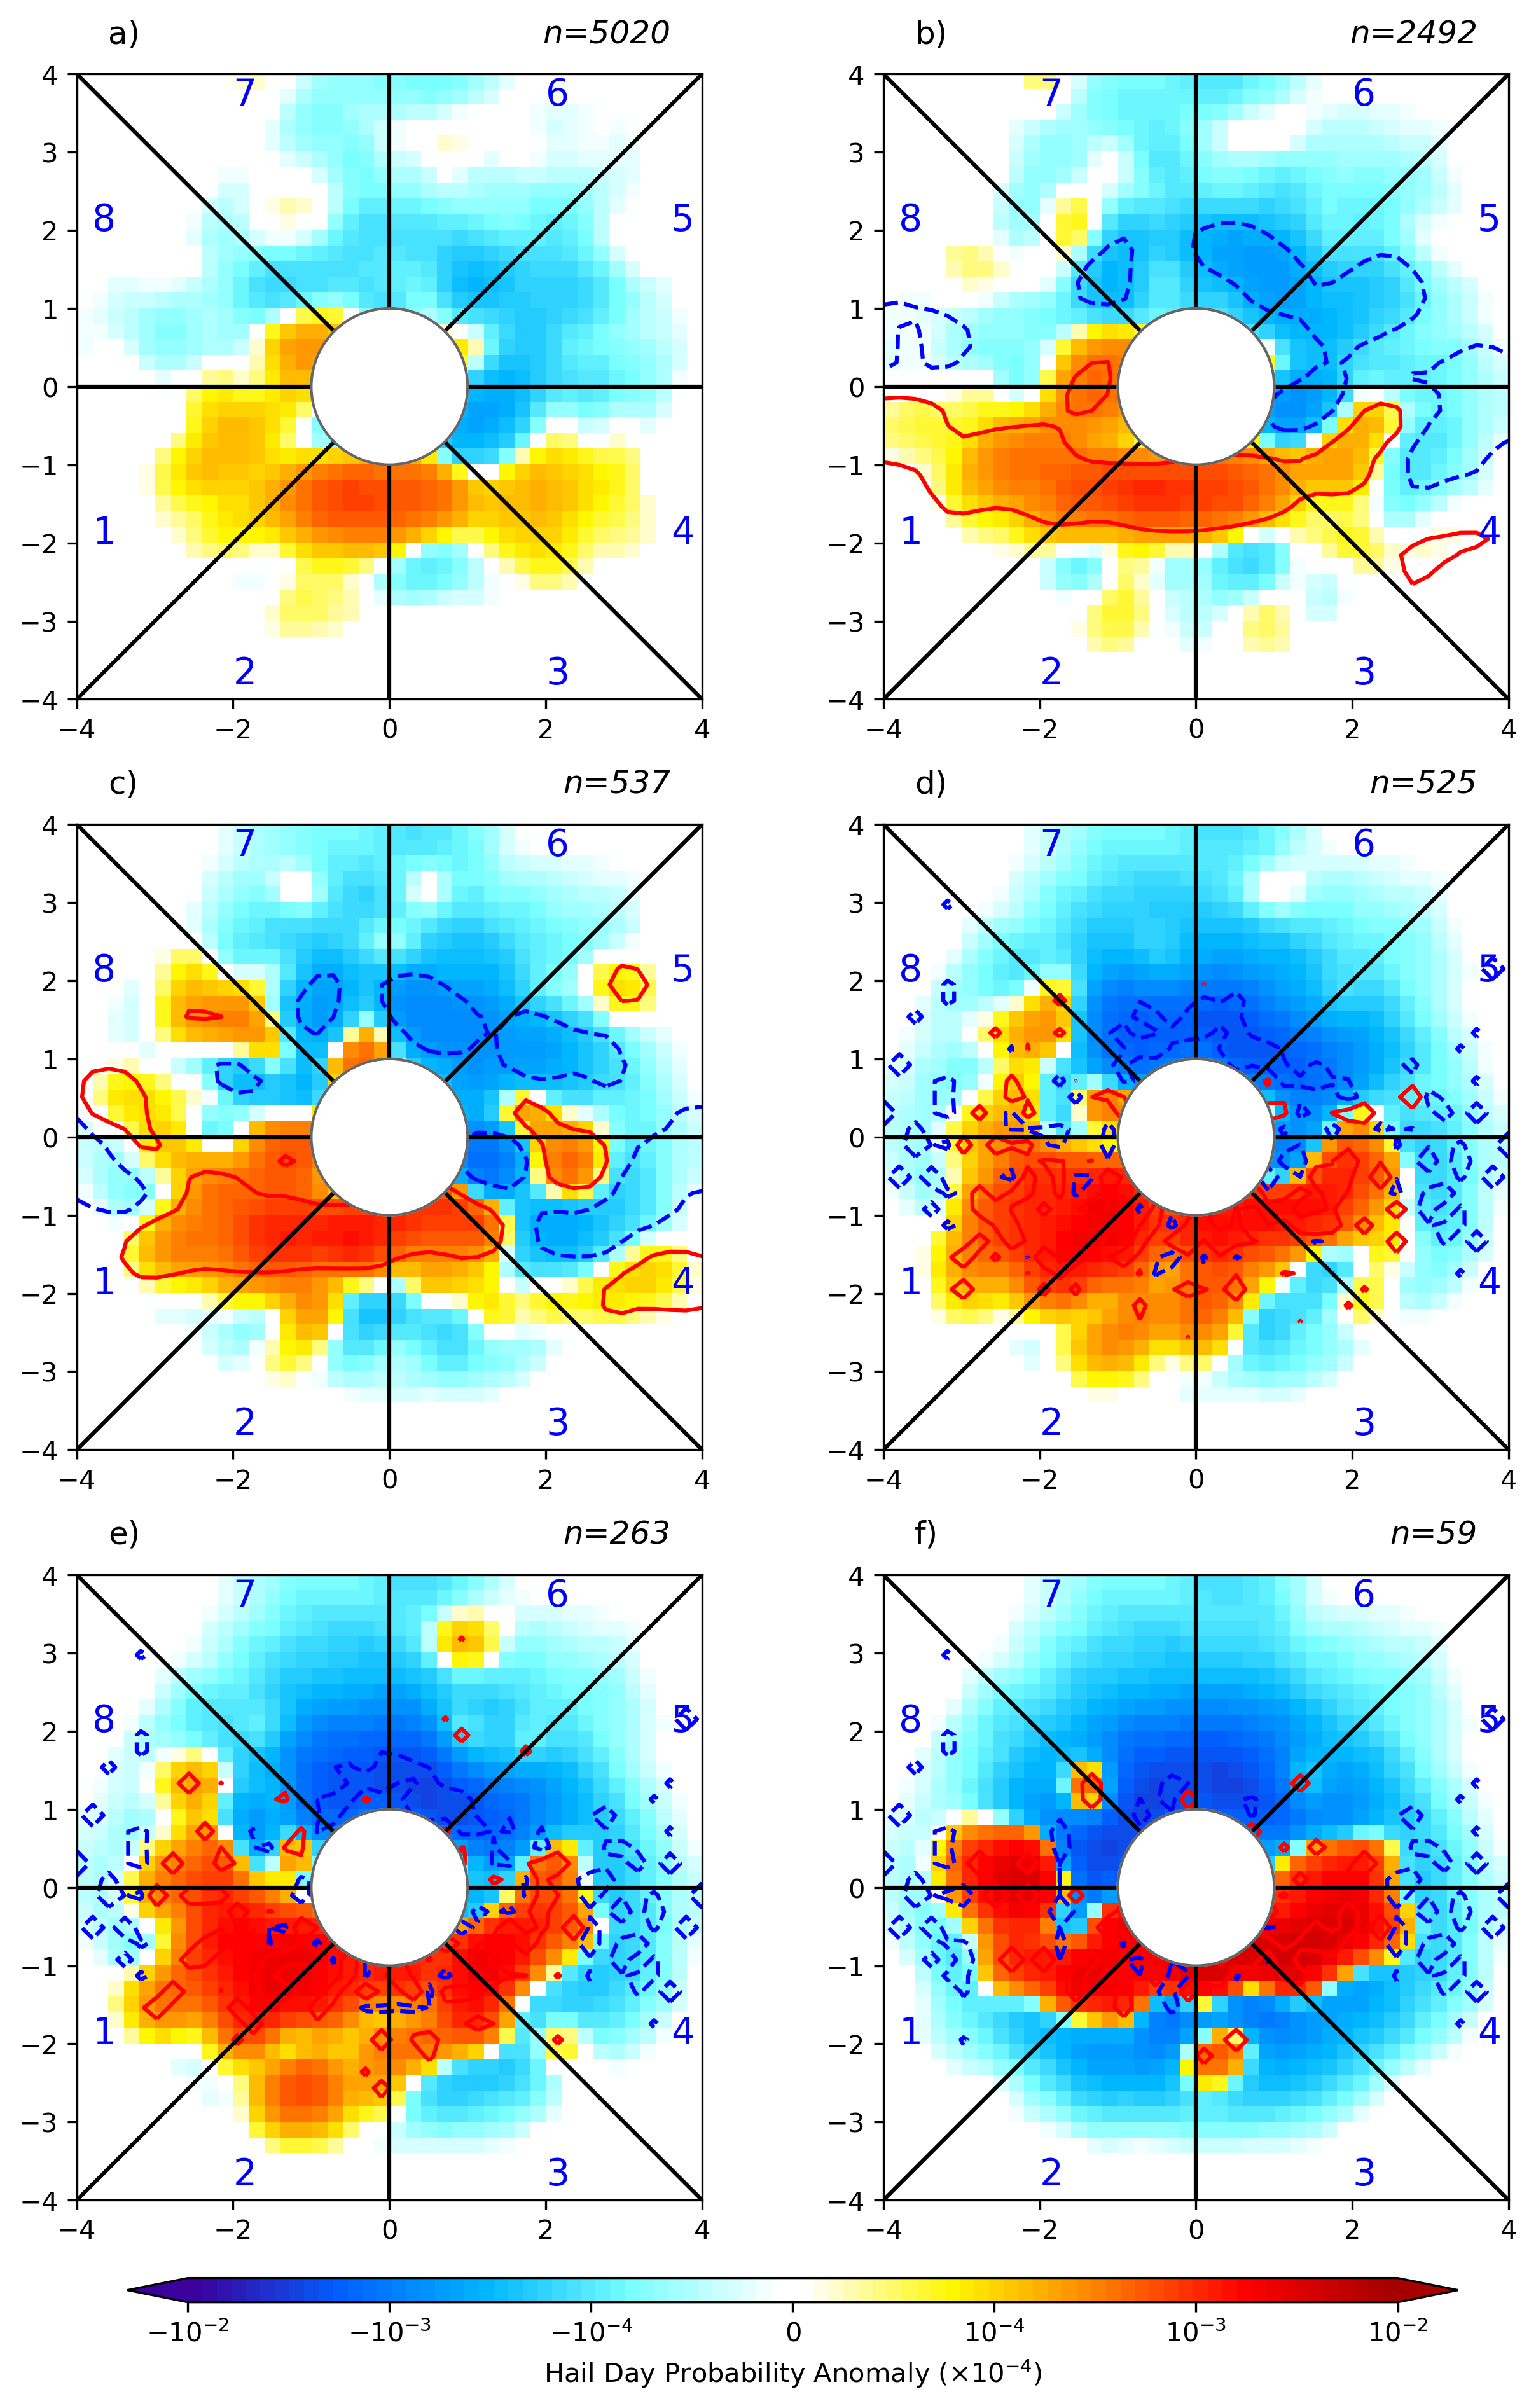

In [11]:
fig, axes = plt.subplots(nrows=3,ncols=2,figsize=(10,18),dpi=300)
for ax in np.arange(0,6,1):
    axes.flat[ax].plot([-4,0],[4,0],'black',ls='-')
    axes.flat[ax].plot([-4,0],[0,0],'black',ls='-')
    axes.flat[ax].plot([-4,0],[-4,0],'black',ls='-')
    axes.flat[ax].plot([0,0],[-4,0],'black',ls='-')
    axes.flat[ax].plot([4,0],[-4,0],'black',ls='-')
    axes.flat[ax].plot([4,0],[0,0],'black',ls='-')
    axes.flat[ax].plot([4,0],[4,0],'black',ls='-')
    axes.flat[ax].plot([0,0],[4,0],'black',ls='-')
    axes.flat[ax].annotate('8', xy=(-3.8, 2),  xycoords='data',color='b', fontsize=14)
    axes.flat[ax].annotate('1', xy=(-3.8, -2),  xycoords='data',color='b', fontsize=14)
    axes.flat[ax].annotate('2', xy=(-2,-3.8),  xycoords='data',color='b', fontsize=14)
    axes.flat[ax].annotate('3', xy=(2,-3.8),  xycoords='data',color='b', fontsize=14)
    axes.flat[ax].annotate('4', xy=(3.6,-2),  xycoords='data',color='b', fontsize=14)
    axes.flat[ax].annotate('5', xy=(3.6,2),  xycoords='data',color='b', fontsize=14)
    axes.flat[ax].annotate('6', xy=(2,3.6),  xycoords='data',color='b', fontsize=14)
    axes.flat[ax].annotate('7', xy=(-2,3.6),  xycoords='data',color='b', fontsize=14)
    wheel_of_death=plt.Circle((0,0),1,color='k',fill=False, zorder =4, alpha=.6)
    axes.flat[ax].add_artist(wheel_of_death)
    wheel_of_death=plt.Circle((0,0),1,color='white',fill=True, alpha=1, zorder=3)
    axes.flat[ax].add_artist(wheel_of_death)

temper_anom = ['#3c009c','#3609A5','#3013AF','#2A1CB9','#2426C3','#1E30CD','#1839D7','#1243E1','#0C4CEB','#0656F5','#0060FF','#0068FF','#0071FF','#0079FF','#0082FF','#008BFF','#0093FF','#009CFF','#00A4FF','#00ADFF','#00B6FF','#0CBDFF','#18C4FF','#24CBFF','#30D3FF','#3CDAFF','#48E1FF','#54E9FF','#60F0FF','#6CF7FF','#79FFFF','#86FFFF','#93FFFF','#A1FFFF','#AEFFFF','#BCFFFF','#C9FFFF','#D6FFFF','#E4FFFF','#F1FFFF','#FFFFFF','#FFFFFF','#FFFFFF','#FFFEE5','#FFFDCC','#FFFCB2','#FFFB99','#FFFB7F','#FFFA66','#FFF94C','#FFF833','#FFF719','#FFF700','#FFEB00','#FFDF00','#FFD300','#FFC700','#FFBB00','#FFAF00','#FFA300','#FF9700','#FF8B00','#FF7F00','#FE7200','#FE6500','#FE5800','#FE4C00','#FE3F00','#FE3200','#FE2600','#FE1900','#FE0C00','#FE0000','#F50000','#EC0000','#E30000','#DA0000','#D20000','#C90000','#C00000','#B70000','#AE0000','#A60000']
cmap = matplotlib.colors.ListedColormap(temper_anom)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1] ]
#track=axes.flat[0].imshow(sev_anom.T,extent=extent,interpolation='nearest',origin='lower',cmap=cmap,vmin=-0.0009,vmax=0.0009)
#axes.flat[1].imshow(sig_anom.T,extent=extent,interpolation='nearest',origin='lower',cmap=cmap,vmin=-0.0009,vmax=0.0009)
#axes.flat[2].imshow(giant_anom.T,extent=extent,interpolation='nearest',origin='lower',cmap=cmap,vmin=-0.0009,vmax=0.0009)
#axes.flat[3].imshow(s90_anom.T,extent=extent,interpolation='nearest',origin='lower',cmap=cmap,vmin=-0.0009,vmax=0.0009)
#axes.flat[4].imshow(s95_anom.T,extent=extent,interpolation='nearest',origin='lower',cmap=cmap,vmin=-0.0009,vmax=0.0009)
#axes.flat[5].imshow(s99_anom.T,extent=extent,interpolation='nearest',origin='lower',cmap=cmap,vmin=-0.0009,vmax=0.0009)
track=axes.flat[0].imshow(sev_anom.T,extent=extent,interpolation='nearest',origin='lower',cmap=cmap,norm=colors.SymLogNorm(linthresh=0.00001, linscale=0.00001,vmin=-.01, vmax=.01))
levs = [1.25,900]
levs1 = [-900,-1.25]
#axes.flat[0].contour(sev_diff.T,levs,cmap=None,extent=extent,colors='red')
#axes.flat[0].contour(sev_diff.T,levs1,cmap=None,extent=extent,colors='blue')
axes.flat[1].imshow(sig_anom.T,extent=extent,interpolation='nearest',origin='lower',cmap=cmap,norm=colors.SymLogNorm(linthresh=0.00001, linscale=0.00001,vmin=-.01, vmax=.01))
axes.flat[1].contour(sig_diff.T,levs,cmap=None,extent=extent,colors='red')
axes.flat[1].contour(sig_diff.T,levs1,cmap=None,extent=extent,colors='blue')
axes.flat[2].imshow(giant_anom.T,extent=extent,interpolation='nearest',origin='lower',cmap=cmap,norm=colors.SymLogNorm(linthresh=0.00001, linscale=0.00001,vmin=-.01, vmax=.01))
axes.flat[2].contour(giant_diff.T,levs,cmap=None,extent=extent,colors='red')
axes.flat[2].contour(giant_diff.T,levs1,cmap=None,extent=extent,colors='blue')
axes.flat[3].imshow(s90_anom.T,extent=extent,interpolation='nearest',origin='lower',cmap=cmap,norm=colors.SymLogNorm(linthresh=0.00001, linscale=0.00001,vmin=-.01, vmax=.01))
axes.flat[3].contour(s90_diff.T,levs,cmap=None,extent=extent,colors='red')
axes.flat[3].contour(s90_diff.T,levs1,cmap=None,extent=extent,colors='blue')
axes.flat[4].imshow(s95_anom.T,extent=extent,interpolation='nearest',origin='lower',cmap=cmap,norm=colors.SymLogNorm(linthresh=0.00001, linscale=0.00001,vmin=-.01, vmax=.01))
axes.flat[4].contour(s95_diff.T,levs,cmap=None,extent=extent,colors='red')
axes.flat[4].contour(s95_diff.T,levs1,cmap=None,extent=extent,colors='blue')
axes.flat[5].imshow(s99_anom.T,extent=extent,interpolation='nearest',origin='lower',cmap=cmap,norm=colors.SymLogNorm(linthresh=0.00001, linscale=0.00001,vmin=-.01, vmax=.01))
axes.flat[5].contour(s99_diff.T,levs,cmap=None,extent=extent,colors='red')
axes.flat[5].contour(s99_diff.T,levs1,cmap=None,extent=extent,colors='blue')
cbar = fig.colorbar(track,ax=axes.ravel().tolist(),ticks=[-.01,-.001,-0.0001,0,0.0001,0.001,0.01], orientation='horizontal', pad=.03,aspect=50, shrink=.9, extend='both')
cbar.set_label('Hail Day Probability Anomaly ' +r'$(\times10^{-4})$' )
axes.flat[0].annotate('a)',(.05,1.05), xycoords='axes fraction', ha='left', fontsize=12)
axes.flat[0].annotate('n='+str(sev_hail_df['date'].count()),(.95,1.05), xycoords='axes fraction', ha='right', fontsize=12,fontstyle='italic')
axes.flat[1].annotate('b)',(.05,1.05), xycoords='axes fraction', ha='left', fontsize=12)
axes.flat[1].annotate('n='+str(sig_hail_df['date'].count()),(.95,1.05), xycoords='axes fraction', ha='right', fontsize=12,fontstyle='italic')
axes.flat[2].annotate('c)',(.05,1.05), xycoords='axes fraction', ha='left', fontsize=12)
axes.flat[2].annotate('n='+str(giant_hail_df['date'].count()),(.95,1.05), xycoords='axes fraction', ha='right', fontsize=12,fontstyle='italic')
axes.flat[3].annotate('d)',(.05,1.05), xycoords='axes fraction', ha='left', fontsize=12)
axes.flat[3].annotate('n='+str(ninetyth_hail_df.mag.count()),(.95,1.05), xycoords='axes fraction', ha='right', fontsize=12,fontstyle='italic')
axes.flat[4].annotate('e)',(.05,1.05), xycoords='axes fraction', ha='left', fontsize=12)
axes.flat[4].annotate('n='+str(ninety5th_hail_df.mag.count()),(.95,1.05), xycoords='axes fraction', ha='right', fontsize=12,fontstyle='italic')
axes.flat[5].annotate('f)',(.05,1.05), xycoords='axes fraction', ha='left', fontsize=12)
axes.flat[5].annotate('n='+str(ninety9th_hail_df.mag.count()),(.95,1.05), xycoords='axes fraction', ha='right', fontsize=12,fontstyle='italic')

#plt.savefig('hailbyGWOphase.eps',format='eps')
#plt.savefig('hailbyGWOphase.png',format='png')
#plt.savefig('hailbyGWOphase.pdf',format='pdf')
plt.show()

###### Figure 2. 1979-2016 Probability anomalies for a) SEV hail, b) SIG hail, c) GIANT hail, d) 90th percentile, e) 95th percentile, and f) 99th percentile hail frequency days. Blue numbers indicate the respective GWO phase. 